# Thai2Vec Embeddings Examples
The `thai2vec.vec` contains 51556 word embeddings of 300 dimensions, in descending order by their frequencies (See `thai2vec.vocab`). The files are in word2vec format readable by `gensim`. Most common applications include word vector visualization, word arithematic, word grouping, cosine similarity and sentence or document vectors.

## Imports

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pythainlp.tokenize import word_tokenize
from fastai.nlp import *
from gensim.models import KeyedVectors

from sklearn.manifold import TSNE
import matplotlib.font_manager as fm

import dill as pickle
import pandas as pd

PATH='/home/ubuntu/data/thaiwiki/'

In [9]:
#load into gensim
model = KeyedVectors.load_word2vec_format(f'{PATH}models/thai2vec.vec',binary=False)

## Visualization

Using t-SNE, we can compress the 300 dimensions of each word into a 2D plane and plot their relationships.

In [75]:
TEXT_vec = pickle.load(open(f'{PATH}models/TEXT_vec.pkl','rb'))
thai2vec = pd.DataFrame(to_np(TEXT_vec.vocab.vectors))
thai2vec.index = TEXT_vec.vocab.itos

In [34]:
labels = model.index2word
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)
thai2plot = tsne.fit_transform(thai2vec)
#pickle.dump(thai2plot,open(f'{PATH}models/thai2plot.pkl','wb'))
thai2plot = pickle.load(open(f'{PATH}models/thai2plot.pkl','rb'))

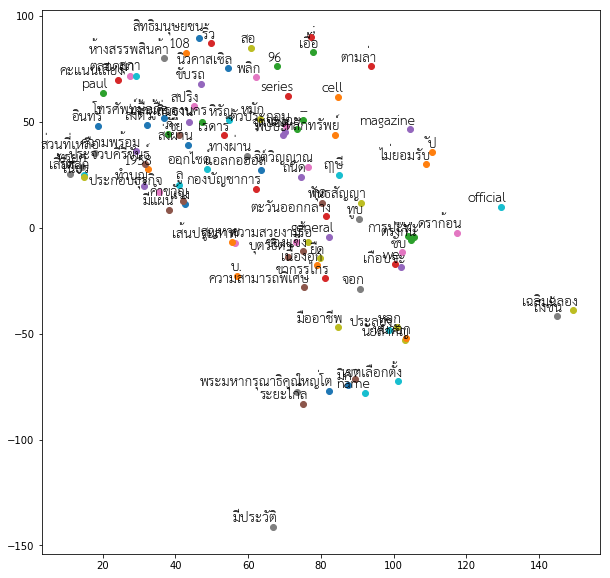

In [155]:
#stolen from https://blog.manash.me/how-to-use-pre-trained-word-vectors-from-facebooks-fasttext-a71e6d55f27
def plot_with_labels(low_dim_embs, labels, filename, figsize=(10,10)):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'{PATH}THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)
    
plot_with_labels(thai2plot[6000:6100],labels[6000:6100],f'{PATH}png/random.png')

## Word Arithematic

You can do simple "arithematic" with words based on the word vectors such as:

* ผู้หญิง + ราชา - ผู้ชาย = ราชินี
* หุ้น - พนัน = กิจการ
* อเมริกัน + ฟุตบอล = เบสบอล

In [156]:
#word arithematic
model.most_similar_cosmul(positive=['ผู้หญิง', 'ราชา'], negative=['ผู้ชาย'])

[('ราชินี', 0.7761763334274292),
 ('กษัตริย์', 0.6965093612670898),
 ('มหาราช', 0.6703882813453674),
 ('ธิบดี', 0.6683550477027893),
 ('ราชาธิราช', 0.6572443842887878),
 ('เสนาบดี', 0.6470994353294373),
 ('ผู้นำ', 0.6462312340736389),
 ('แม่ทัพ', 0.6437844634056091),
 ('ยักษ์', 0.6393284797668457),
 ('นายพล', 0.6388123631477356)]

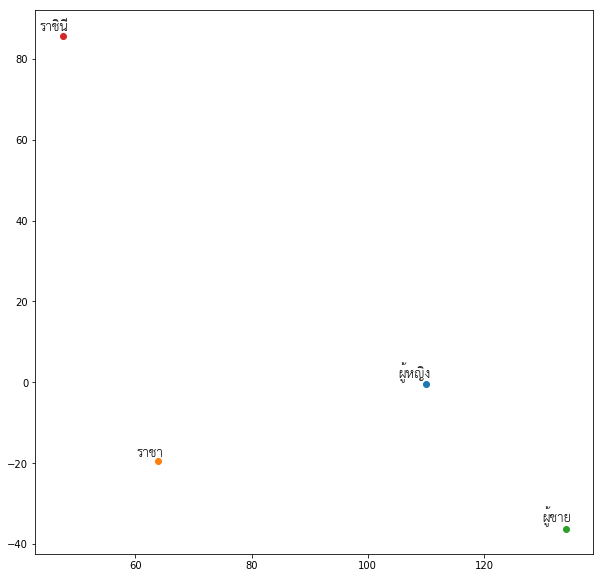

In [157]:
sample_words = ['ผู้หญิง','ราชา','ผู้ชาย','ราชินี']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/word_arithematic_queen.png')

In [158]:
model.most_similar_cosmul(positive=['หุ้น'],negative=['พนัน'])

[('กิจการ', 1.2205294370651245),
 ('ยีน', 1.2164785861968994),
 ('ทรัพย์สิน', 1.183977723121643),
 ('ตลาดหลักทรัพย์', 1.1831538677215576),
 ('ดอลลาร์', 1.1829843521118164),
 ('หลักทรัพย์', 1.175452470779419),
 ('ตัว', 1.1676032543182373),
 ('state', 1.1670209169387817),
 ('ผู้ถือหุ้น', 1.1638373136520386),
 ('group', 1.1557708978652954)]

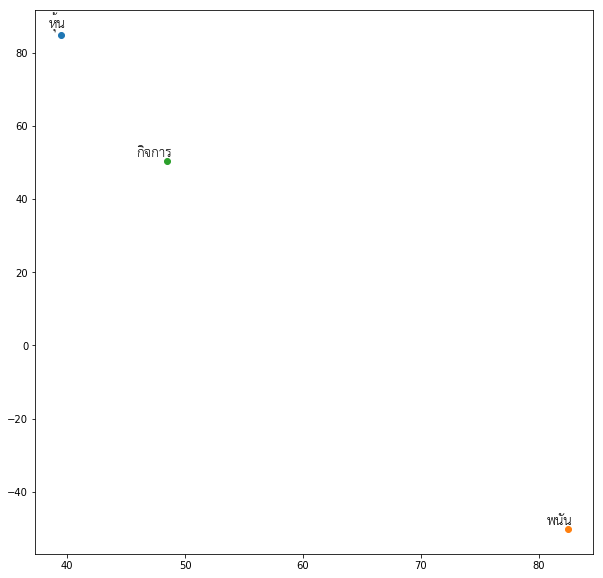

In [159]:
sample_words = ['หุ้น','พนัน','กิจการ']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/word_arithematic_business.png')

In [160]:
#word arithematic
model.most_similar_cosmul(positive=['อเมริกัน','ฟุตบอล'], negative=[])

[('เบสบอล', 0.4546390175819397),
 ('บริติช', 0.42122069001197815),
 ('อเมริกา', 0.41631796956062317),
 ('เยอรมัน', 0.41300028562545776),
 ('บาสเกตบอล', 0.4092806875705719),
 ('ฮอกกี้', 0.40030571818351746),
 ('ยุคใหม่', 0.3994702994823456),
 ('แอฟริกัน', 0.3974072337150574),
 ('รักบี้', 0.393878698348999),
 ('พรีเมียร์', 0.39144793152809143)]

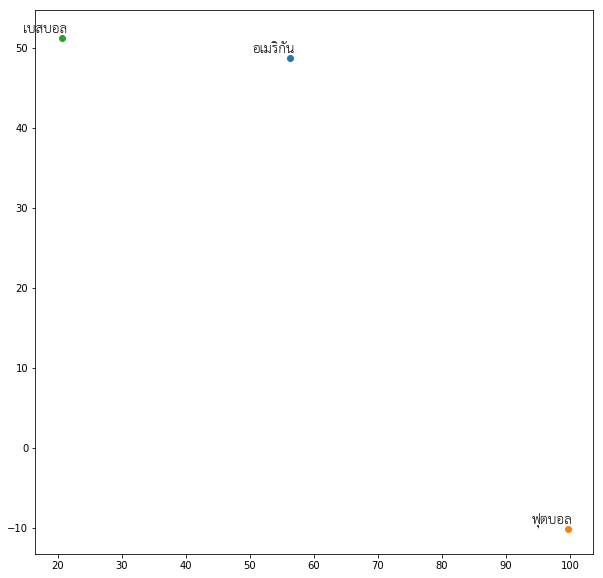

In [161]:
sample_words = ['อเมริกัน','ฟุตบอล','เบสบอล']
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/word_arithematic_baseball.png')

## Doesn't Match

It can also be used to do word groupings. For instance:
* อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน - อาหารสัตว์ is type of food whereas others are meals in the day
* ลูกสาว ลูกสะใภ้ ลูกเขย ป้า - ลูกสาว is immediate family whereas others are not
* กด กัด กิน เคี้ยว - กด is not verbs for the eating process
Note that this could be relying on a different "take" than you would expect. For example, you could have answered ลูกเขย in the second example because it  is the one associated with male gender.

In [162]:
model.doesnt_match("อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน".split())

'อาหารสัตว์'

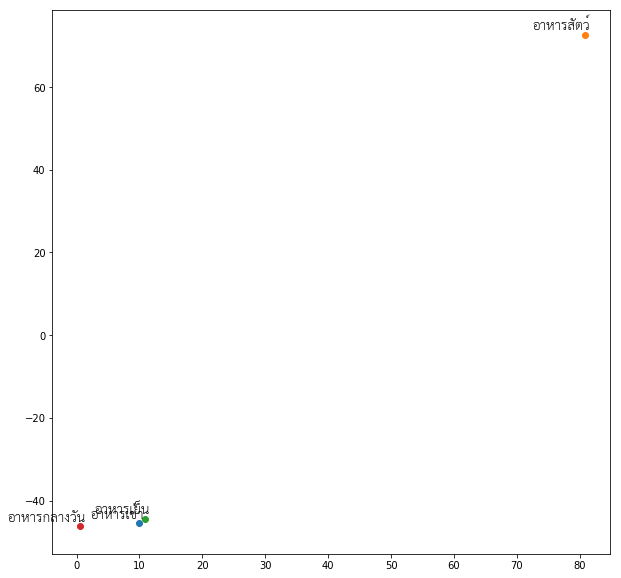

In [163]:
sample_words = "อาหารเช้า อาหารสัตว์ อาหารเย็น อาหารกลางวัน".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/doesnt_match1.png')

In [192]:
model.doesnt_match("ลูกสาว ลูกสะใภ้ ลูกเขย ป้า".split())

'ลูกสาว'

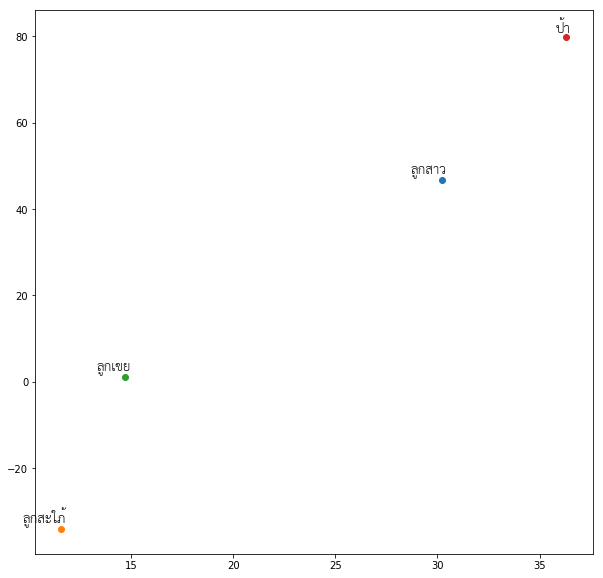

In [193]:
sample_words = "ลูกสาว ลูกสะใภ้ ลูกเขย ป้า".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/doesnt_match2.png')

In [181]:
model.doesnt_match("กด กัด กิน เคี้ยว".split())

'กด'

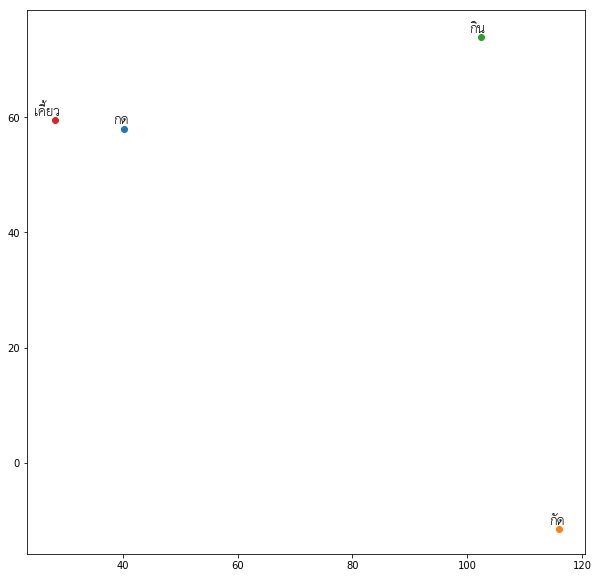

In [182]:
sample_words = "กด กัด กิน เคี้ยว".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/doesnt_match3.png')

## Cosine Similarity

In [164]:
print('Country + its capital:', model.similarity('ปักกิ่ง', 'จีน'))
print('Country + its capital:', model.similarity('โรม','อิตาลี'))
print('One capital and another:', model.similarity('โรม', 'ปักกิ่ง'))
print('Country + NOT its capital:', model.similarity('โรม', 'จีน'))
print('Country + NOT its capital:', model.similarity('ปักกิ่ง', 'อิตาลี'))

Country + its capital: 0.31359560752667964
Country + its capital: 0.42819627065839394
One capital and another: 0.27347283956785434
Country + NOT its capital: 0.02666692964073511
Country + NOT its capital: 0.17900795797557473


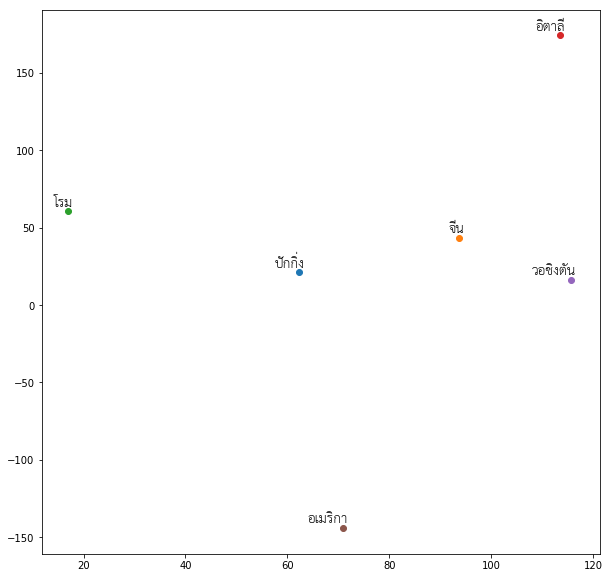

In [178]:
sample_words = "ปักกิ่ง จีน โรม อิตาลี วอชิงตัน อเมริกา".split()
sample_idx = []
for word in sample_words:
    sample_idx.append(labels.index(word))
sample_plot = thai2plot[sample_idx]
plot_with_labels(sample_plot,sample_words,f'{PATH}png/cosine_sim.png')

## Sentence Vector

One of the most immediate use cases for thai2vec is using it to estimate a sentence vector for text classification.

In [166]:
def sentence_vectorizer(ss,model,dim=300,use_mean=False):
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
        if word in model.wv.index2word:
            vec+= model.wv.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return(vec)

In [167]:
ss = 'วันนี้วันดีปีใหม่'
sentence_vectorizer(ss,model,use_mean=True)

array([[-0.25348, -0.05063,  0.02758, -0.08955, -0.07773,  0.0191 , -0.04762,  0.20099,  0.03039,  0.03558,
        -0.04932, -0.02575,  0.12829,  0.19012, -0.05663, -0.11568, -0.01156, -0.12645, -0.02467,  0.0073 ,
         0.07606, -0.22588, -0.00385,  0.12873, -0.43795, -0.04352,  0.06903,  0.04338, -0.05588, -0.21542,
        -0.01612, -0.00255,  0.12257, -0.21418, -0.07536, -0.15723, -0.11544,  0.17626, -0.02639, -0.02212,
         0.08065,  0.16641,  0.07922,  0.04447,  0.00747,  0.1059 ,  0.08577, -0.04956, -0.08693,  0.46667,
         0.05504, -0.05771, -0.05878,  0.07173, -0.03082,  0.0866 ,  0.09703,  0.09869,  0.11751, -0.15589,
        -0.04719, -0.06402, -0.15081, -0.07991, -0.14234,  0.01119, -0.10553,  0.06175,  0.05721, -0.23479,
         0.05067,  0.05299,  0.03897, -0.22646, -0.22721,  0.04679,  0.00149, -0.11204, -0.02653,  0.03029,
         0.05378,  0.0977 , -0.15197,  0.02737, -0.22025, -0.00758,  0.01164, -0.00603, -0.09538, -0.00549,
        -0.09055, -0.02059, 